<h2 style="color:red" align="center">TASK 4 OASIS </H2>

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

**READING DATA**

In [37]:
data=pd.read_csv('spam12.csv')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [38]:
data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

**ORGANISING DATA**

In [39]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns')
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
new_data=data.where((pd.notnull(data)),'')
new_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
new_data.shape

(5572, 2)

**SPAM MAIL=0,HAM MAIL=1**

In [75]:
new_data.loc[new_data['v1'] == 'spam','v1',]=0
new_data.loc[new_data['v1'] == 'ham','v1',]=1

In [76]:
new_data.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


**ORGANISING DATA**

In [77]:
x=new_data['v2']
y=new_data['v1']

In [78]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [79]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object


**TRAIN TEST SPLIT**

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

In [81]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

In [82]:
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

In [83]:
print(x_train_features)

  (0, 2765)	0.35443712059828647
  (0, 4401)	0.36604699068797
  (0, 4311)	0.2562553297895484
  (0, 4517)	0.39050067104344305
  (0, 1078)	0.40211054113312655
  (0, 3370)	0.2728240651443745
  (0, 1457)	0.30676370006344633
  (0, 5847)	0.43817409157828313
  (1, 4760)	0.24114542387747062
  (1, 3669)	0.23757841259564744
  (1, 4697)	0.21600963003654358
  (1, 3194)	0.17643189486420918
  (1, 5741)	0.3478662644848623
  (1, 4767)	0.29114638769300666
  (1, 1722)	0.3072898011610195
  (1, 1029)	0.3903347567216549
  (1, 2622)	0.3903347567216549
  (1, 3807)	0.22689403932240756
  (1, 2478)	0.38885663167384
  (2, 4323)	0.399072461271397
  (2, 212)	0.399072461271397
  (2, 3291)	0.2775303212050339
  (2, 2305)	0.31829163384415804
  (2, 4253)	0.22486806620559888
  (2, 2176)	0.347013855014907
  :	:
  (3339, 2741)	0.20805216161302958
  (3339, 4432)	0.2260775220859017
  (3339, 1748)	0.2040531640891481
  (3339, 3392)	0.21099442505481608
  (3339, 4253)	0.167452249270001
  (3339, 2478)	0.29605148632651124
  (3340,

In [84]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

**CREATING LR MODEL**

In [85]:
model=LogisticRegression()

**TRAINING MODEL**

In [86]:
model.fit(x_train_features,y_train)

LogisticRegression()

In [87]:
expected=y_train
predicted=model.predict(x_train_features)

**REPORT**

In [88]:
print(classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.99      0.72      0.84       439
           1       0.96      1.00      0.98      2904

    accuracy                           0.96      3343
   macro avg       0.98      0.86      0.91      3343
weighted avg       0.96      0.96      0.96      3343



**CONFUSION MATRIX**

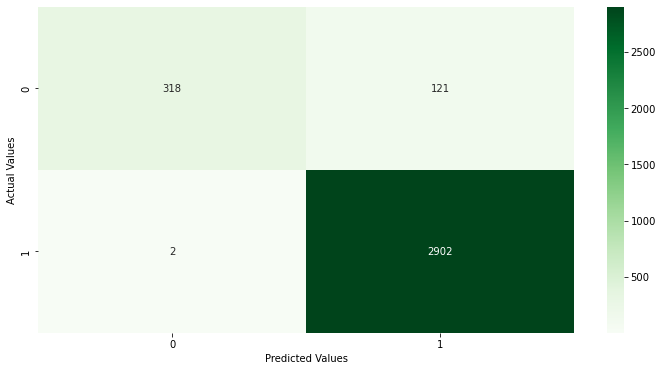

In [89]:
cm=confusion_matrix(expected,predicted)
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.savefig('confusion_matrix.png')

**MODEL CHECKING**

In [92]:
#GIVING A HAM INPUT
mail=["U have a secret admirer who is looking 2 make contact with U-find out who they reveal who thinks UR so special-call on 09058094597"]

#CONVERTING MAIL INTO VVECTOR FORM
mail_extraction=feature_extraction.transform(mail)

#MAKING PREDICTION
prediction=model.predict(mail_extraction)
print(prediction)

[0]


<h2 style="color:red" align="center">MODEL IS PREDICTING 0 WHICH IS SPAM MAIL </H2>